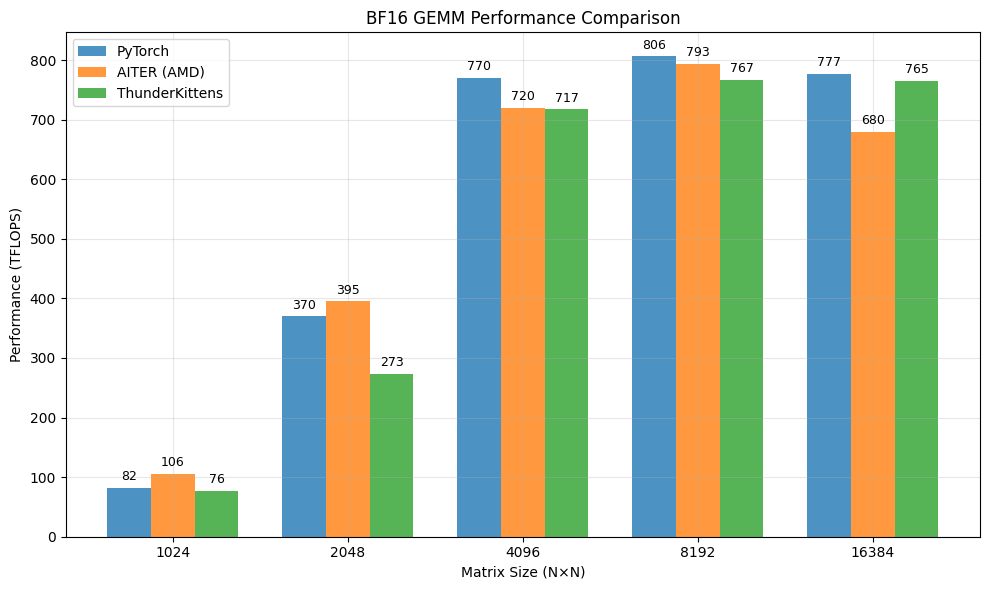

Matrix sizes tested: [1024, 2048, 4096, 8192, 16384]
PyTorch TFLOPS: ['81.82', '369.61', '769.64', '806.21', '776.78']
AITER (AMD) TFLOPS: ['105.79', '394.83', '719.63', '793.16', '679.99']
TK TFLOPS: ['76.43', '273.16', '717.08', '766.75', '765.31']


In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Read data
with open('kernels/data_to_log.json', 'r') as f:
    data = json.load(f)

# Extract data for plotting
matrix_sizes = sorted([int(size) for size in data.keys()])
pytorch_tflops = [data[str(size)]['tflops_pytorch'] for size in matrix_sizes]
aiter_tflops = [data[str(size)]['tflops_aiter'] for size in matrix_sizes]
tk_tflops = [data[str(size)]['tflops'] for size in matrix_sizes]

# Create bar chart
x = np.arange(len(matrix_sizes))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars0 = ax.bar(x - width, pytorch_tflops, width, label='PyTorch', alpha=0.8)
bars1 = ax.bar(x, aiter_tflops, width, label='AITER (AMD)', alpha=0.8)
bars2 = ax.bar(x + width, tk_tflops, width, label='ThunderKittens', alpha=0.8)

# Add value labels on bars
for bar, value in zip(bars0, pytorch_tflops):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(max(pytorch_tflops), max(aiter_tflops), max(tk_tflops)) * 0.01,
            f'{value:.0f}', ha='center', va='bottom', fontsize=9)

for bar, value in zip(bars1, aiter_tflops):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(max(pytorch_tflops), max(aiter_tflops), max(tk_tflops)) * 0.01,
            f'{value:.0f}', ha='center', va='bottom', fontsize=9)

for bar, value in zip(bars2, tk_tflops):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(max(pytorch_tflops), max(aiter_tflops), max(tk_tflops)) * 0.01,
            f'{value:.0f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Matrix Size (N×N)')
ax.set_ylabel('Performance (TFLOPS)')
ax.set_title('BF16 GEMM Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(matrix_sizes)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary
print(f"Matrix sizes tested: {matrix_sizes}")
print(f"PyTorch TFLOPS: {[f'{t:.2f}' for t in pytorch_tflops]}")
print(f"AITER (AMD) TFLOPS: {[f'{t:.2f}' for t in aiter_tflops]}")
print(f"TK TFLOPS: {[f'{t:.2f}' for t in tk_tflops]}")